# Worksheet 12

Name:  Mao Mao 
UID: U02043894

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes. This is a binary classification problem. Given their GPA, the output will be 1 and 0. 1 indicating student will be offered a job, 0 indicating student won't be offered a job.

2. No. This is a regression problem. It's not practical to turn the number of months into indefinite amount of classes.

3. Yes. Inputs are descriptions in the review, and outputs are 1, 2, 3, 4, 5 indicating the amount of stars.

4. No. Regression problem.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Given a dataset, I would split the dataset into a training set, a validation set, and a test set.
Then preprocess the data to handle any missing values and outliers. Moreover, it's practical to normalize the features.
Feature engineering including feature extractions would help us find the important features.
It is also critical to select an appropriate machine learning algorithm based on the problem.
Before, testing the data on the unseen test set. We can evaluate the model's performance on the validation set. Hyperparameter tuning can be done by evaluating on validation set.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting often occurs when a the model didn't sufficiently learns the important features in the data. Underfitting models usually poorly on both training and testing data set. Since it fails to capture useful/required features/relationships.

Overfitting is usually caused by the  model performs too well on the training data. It incorporates outliers/noise and treats those relationships as relevant, even though they aren't. It doesn't perform well on unseen data set.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

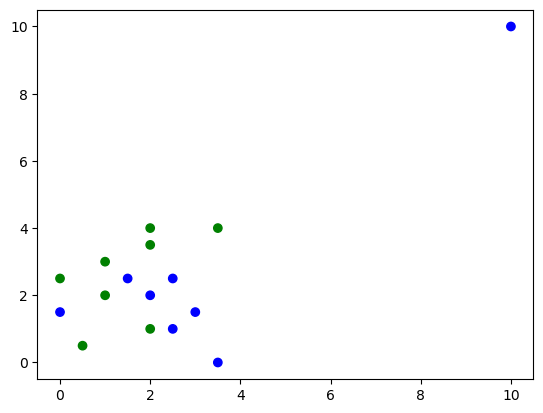

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Yes, (10, 10) is an outlier. It has been removed.

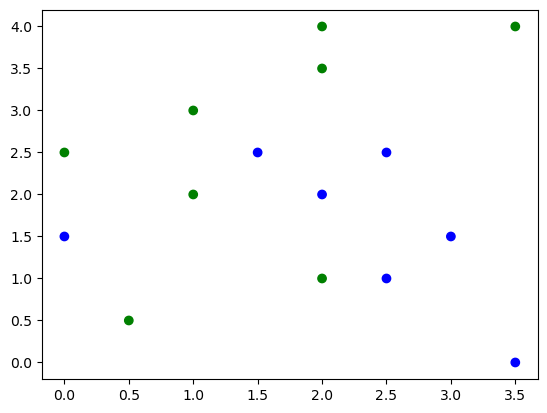

In [3]:
#remove (10,10)
for key in data:
    data[key] = data[key][:-1]

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

All points seem to be falling in the same distribution.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

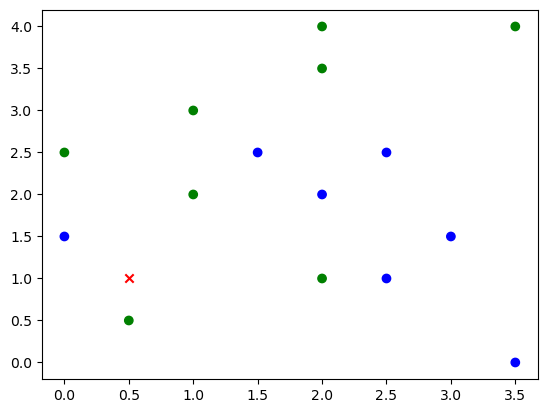

In [4]:
plt.scatter(data["Attribute A"], data["Attribute B"], c=colors[data["Class"]].tolist())

new_point = (0.5, 1)
plt.scatter(new_point[0], new_point[1], c='r', marker='x')

plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

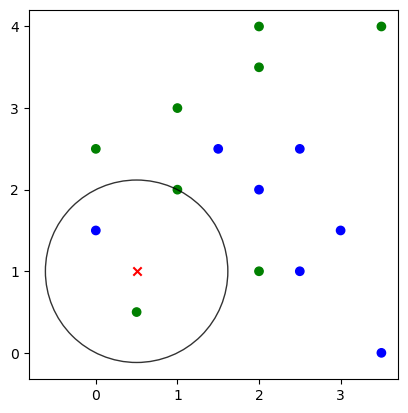

In [5]:
def euclidean_distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

# Function to find n closest points
def n_closest_to(example, n, data):
    distances = [(euclidean_distance(example, (data["Attribute A"][i], data["Attribute B"][i])), (data["Attribute A"][i], data["Attribute B"][i])) for i in range(len(data["Attribute A"]))]
    closest = sorted(distances, key=lambda x: x[0])[:n]
    return closest

location = (0.5, 1)
closest_points = n_closest_to(location, 3, data)
radius = closest_points[-1][0]
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], c=colors[data["Class"]].tolist())
axes.scatter(location[0], location[1], c='r', marker='x')
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [6]:
def majority_class(closest_points, data):
    class_counts = {}
    for dist, point in closest_points:
        index_A = data["Attribute A"].index(point[0])
        point_class = data["Class"][index_A]
        
        if point_class in class_counts:
            class_counts[point_class] += 1
        else:
            class_counts[point_class] = 1
            
    # Find majority class (choose class 0 in case of a tie)
    return max(class_counts.items(), key=lambda x: x[1], default=(0, 0))[0]

neighbors = n_closest_to(location, 3, data)

print("The class with majority of points is Class", majority_class(neighbors, data))

The class with majority of points is Class 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [8]:
count = 0
for i in range(len(data["Attribute A"])):
    actual_class = data["Class"][i]
    # Training set excluding the current point
    training_set = {
        "Attribute A": data["Attribute A"][:i] + data["Attribute A"][i + 1:],
        "Attribute B": data["Attribute B"][:i] + data["Attribute B"][i + 1:],
        "Class": data["Class"][:i] + data["Class"][i + 1:]
    }
    point_current = (data["Attribute A"][i], data["Attribute B"][i])
    closest_points = n_closest_to(point_current, 3, training_set)
    prediction = majority_class(closest_points, training_set)
    if prediction == actual_class:
        count += 1

accuracy = count / len(data["Attribute A"])
print(f"Overall testing accuracy: {accuracy:.2f}")

Overall testing accuracy: 0.60


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [9]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
# Load the MNIST 784 dataset
mnist = fetch_openml('mnist_784', version=1)

# Split the dataset into training and testing datasets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, test_size=0.2, random_state=1)

# Check the shapes of the resulting datasets to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

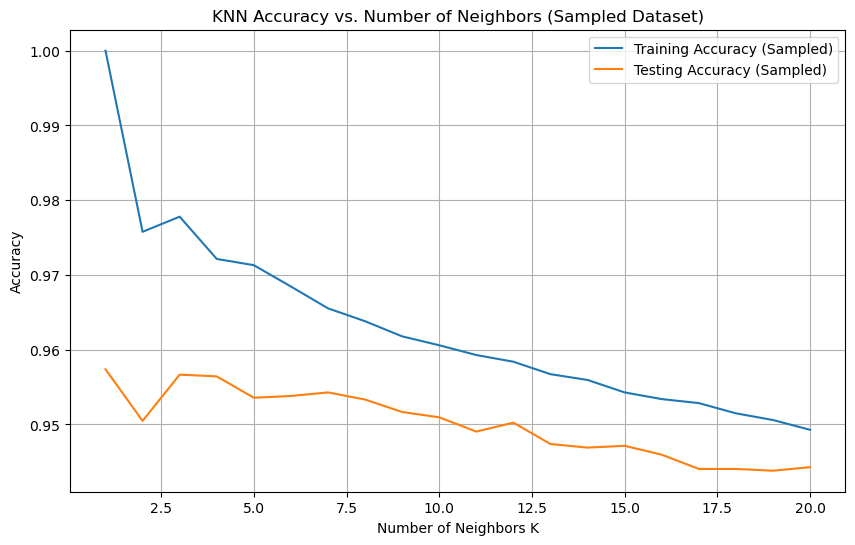

(1, 0.9573809523809523)

In [17]:
# Re-import necessary libraries after reset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST 784 dataset again
mnist = fetch_openml('mnist_784', version=1)

# Shuffle the dataset to ensure random sampling
X, y = shuffle(mnist.data, mnist.target, random_state=1)

# Take a 10% sample of the dataset
sample_size = int(0.3 * X.shape[0])
X_sample = X[:sample_size]
y_sample = y[:sample_size]

# Split the sampled dataset into training and testing datasets with an 80-20 ratio
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=1)

# Initialize lists to store the accuracies for the sampled dataset
training_accuracies_sample = []
testing_accuracies_sample = []

# Range of k to test
k_range = range(1, 21)

for k in k_range:
    # Initialize the KNN classifier with the current value of k for the sampled dataset
    knn_sample = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model to the training data of the sampled dataset
    knn_sample.fit(X_train_sample, y_train_sample)
    
    # Predict on the training data and calculate accuracy for the sampled dataset
    y_train_pred_sample = knn_sample.predict(X_train_sample)
    train_accuracy_sample = accuracy_score(y_train_sample, y_train_pred_sample)
    training_accuracies_sample.append(train_accuracy_sample)
    
    # Predict on the testing data and calculate accuracy for the sampled dataset
    y_test_pred_sample = knn_sample.predict(X_test_sample)
    test_accuracy_sample = accuracy_score(y_test_sample, y_test_pred_sample)
    testing_accuracies_sample.append(test_accuracy_sample)

# Plotting the accuracies for the sampled dataset
plt.figure(figsize=(10, 6))
plt.plot(k_range, training_accuracies_sample, label='Training Accuracy (Sampled)')
plt.plot(k_range, testing_accuracies_sample, label='Testing Accuracy (Sampled)')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors (Sampled Dataset)')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal k value based on testing accuracy for the sampled dataset
optimal_k_sample = k_range[np.argmax(testing_accuracies_sample)]
optimal_accuracy_sample = np.max(testing_accuracies_sample)
optimal_k_sample, optimal_accuracy_sample


c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

/Users/maomao/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


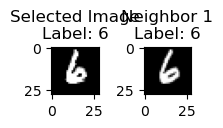

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

optimal_k = optimal_k_sample
# Assuming `optimal_k` is known and KNN model is trained with `X_train_sample`, `y_train_sample`
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best.fit(X_train_sample, y_train_sample)

# Select a random image from the test set

random_index = np.random.randint(len(X_test_sample))



if isinstance(X_test_sample, pd.DataFrame):
    random_image = X_test_sample.iloc[random_index].values.reshape(28, 28)  # For DataFrame
    random_image_label = y_test_sample.iloc[random_index]
else:
    random_image = X_test_sample[random_index].reshape(28, 28)  # For NumPy array
    random_image_label = y_test_sample[random_index]



# print(type(X_test_sample))
# print(X_test_sample)
# random_image = X_train_sample.iloc[random_index].values.reshape(28, 28)
# random_image_label = y_train_sample.iloc[random_index]

# Find the K nearest neighbors of the random image
# neigh = NearestNeighbors(n_neighbors=optimal_k)
# neigh.fit(X_train_sample)



neigh = NearestNeighbors(n_neighbors=optimal_k)
neigh.fit(X_train_sample)

# Reshape the random test image for NearestNeighbors compatibility
flattened_image = random_image.reshape(1, -1)  # Reshape the image to 1D
distances, indices = neigh.kneighbors(flattened_image)



# flattened_image = random_image.reshape(1, -1)  # Reshape the image to 1D
# distances, indices = neigh.kneighbors(flattened_image)


# Plot the selected image
plt.figure(figsize=(2 * optimal_k, 4))
plt.subplot(1, optimal_k + 1, 1)
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"Selected Image\nLabel: {random_image_label}")

# Plot each of the K nearest neighbors
for i, index in enumerate(indices[0], start=2):
    plt.subplot(1, optimal_k + 1, i)
    neighbor_image = X_train_sample.iloc[index].to_numpy().reshape(28, 28)
    neighbor_label = y_train_sample.iloc[index]
    plt.imshow(neighbor_image, cmap='gray')
    plt.title(f"Neighbor {i-1}\nLabel: {neighbor_label}")

plt.tight_layout()
plt.show()


d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

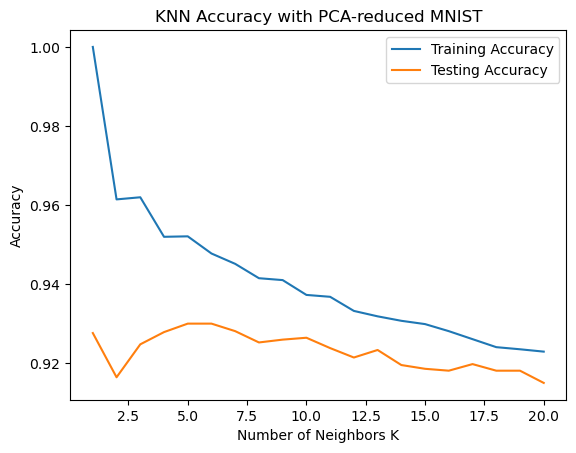

PCA reduced the dataset to 297 dimensions.


In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_sample)

# PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_reduced = pca.fit_transform(X_scaled)
X_test_reduced = pca.transform(scaler.transform(X_test_sample))

# Range of k to test
k_range = range(1, 21)
training_accuracies = []
testing_accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_reduced, y_train_sample)
    # Training accuracy
    y_train_pred = knn.predict(X_reduced)
    training_accuracies.append(accuracy_score(y_train_sample, y_train_pred))
    # Testing accuracy
    y_test_pred = knn.predict(X_test_reduced)
    testing_accuracies.append(accuracy_score(y_test_sample, y_test_pred))

# Plot the results
plt.plot(k_range, training_accuracies, label='Training Accuracy')
plt.plot(k_range, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.legend()
plt.title('KNN Accuracy with PCA-reduced MNIST')
plt.show()
print(f"PCA reduced the dataset to {pca.n_components_} dimensions.")


Principal Component Analysis (PCA) reduces the MNIST dataset from its original 784 dimensions to 297, retaining 95% of the dataset's variance, aiming for a balance between complexity reduction and information preservation. However, this reduction may marginally impair performance due to several factors. Firstly, the 5% variance loss might contain critical information for accurate classification by the KNN model, particularly in distinguishing similar digits. Secondly, the KNN model's reliance on distance metrics means that any alteration in the dataset's geometry could affect its prediction accuracy, especially for data points near class boundaries. Thirdly, while PCA helps mitigate the curse of dimensionality—where high-dimensional spaces dilute the meaningfulness of distance measurements—overly aggressive dimensionality reduction might eliminate nuanced data features essential for precise classification. Lastly, the principal components, which maximize variance, may not align with the most discriminative features for classification. Despite these challenges, dimensionality reduction through PCA offers computational efficiency and potentially reduces overfitting by eliminating noise and irrelevant features. Nonetheless, the slight performance dip observed might result from the critical information loss, underscoring the trade-off between efficiency and the richness of information necessary for accurate classification.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Feature engineering and preprocessing
for df in [train_df, test_df]:
    # New feature: FamilySize
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    # New feature: IsAlone
    df['IsAlone'] = (df['FamilySize'] == 0).astype(int)
    
    # New feature: Title extracted from the name
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # Filling missing 'Embarked' values with the mode
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
    # Filling missing 'Fare' values with the median fare
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Encoding 'Sex', 'Embarked', and 'Title' using OneHotEncoder and filling missing values
categorical_features = ['Sex', 'Embarked', 'Title']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Scaling numerical features and filling missing values
numerical_features = ['Age', 'Fare', 'FamilySize', 'Pclass', 'IsAlone']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Creating the KNN model pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

# Splitting the training data for validation
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df

# Using cross-validation to find the best k
k_values = range(1, 21)
best_score = 0
best_k = 1
for k in k_values:
    knn_pipeline.set_params(classifier__n_neighbors=k)
    scores = cross_val_score(knn_pipeline, X_train, y_train, cv=5, scoring='accuracy')
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_k = k

print(f"Best k: {best_k} with score: {best_score}")

# Retraining the model on the full training set with the best k
knn_pipeline.set_params(classifier__n_neighbors=best_k)
knn_pipeline.fit(X_train, y_train)

# Predicting on the test set
test_predictions = knn_pipeline.predict(X_test)

# Creating the submission DataFrame
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_predictions})

# Saving the submission file
submission.to_csv('titanic_submission_improved.csv', index=False)


Best k: 12 with score: 0.822666499278137


Identifying the optimal k in the KNN algorithm for predicting Titanic survivors is intricate and multi-staged. It begins with the crucial task of data preprocessing and feature engineering, where handling missing values is paramount. In this stage, missing data for continuous variables such as Age are imputed using median or mean values, while for categorical variables, the mode or dummy variables are employed. The creation of new features, like FamilySize from SibSp and Parch, and IsAlone from FamilySize, aims to better capture the dynamics affecting survival probabilities. Moreover, the normalization of data addresses the KNN algorithm's dependence on distance measurements, ensuring that all features contribute equally to the model's decisions and preventing any one feature from dominating due to its scale.

The second phase focuses on determining the ideal k value, a critical step for the algorithm's performance. A comprehensive exploration of k values is undertaken to find a balance between overfitting and underfitting, with a smaller k making the model too sensitive to noise, and a larger k possibly blurring distinct patterns. Employing k-fold cross-validation facilitates a thorough evaluation of the model's performance across different k values by rotating the validation set among all subsets of the data. The goal is to select a k that minimizes error or maximizes accuracy, thus ensuring the model's effectiveness on unseen data. The optimal k is one that achieves a balance, offering a model with low bias and low variance, adept at generalizing to new data.

With the optimal k value determined, the final stage involves training the KNN model on the complete training dataset and predicting survival on the test set. This step ensures that the model is as refined as possible, applying the same data preprocessing steps, including normalization with parameters from the training set, to the test data before making predictions. This comprehensive approach, from meticulous data preparation through to careful k selection and model training, underscores the complexity of developing a predictive model that is both accurate and robust. The right choice of k is instrumental in unlocking the model’s potential to correctly classify the survival outcomes of Titanic passengers, navigating the complexities of machine learning with precision and insight.

link to my submission:
https://www.kaggle.com/competitions/titanic/leaderboard#9348


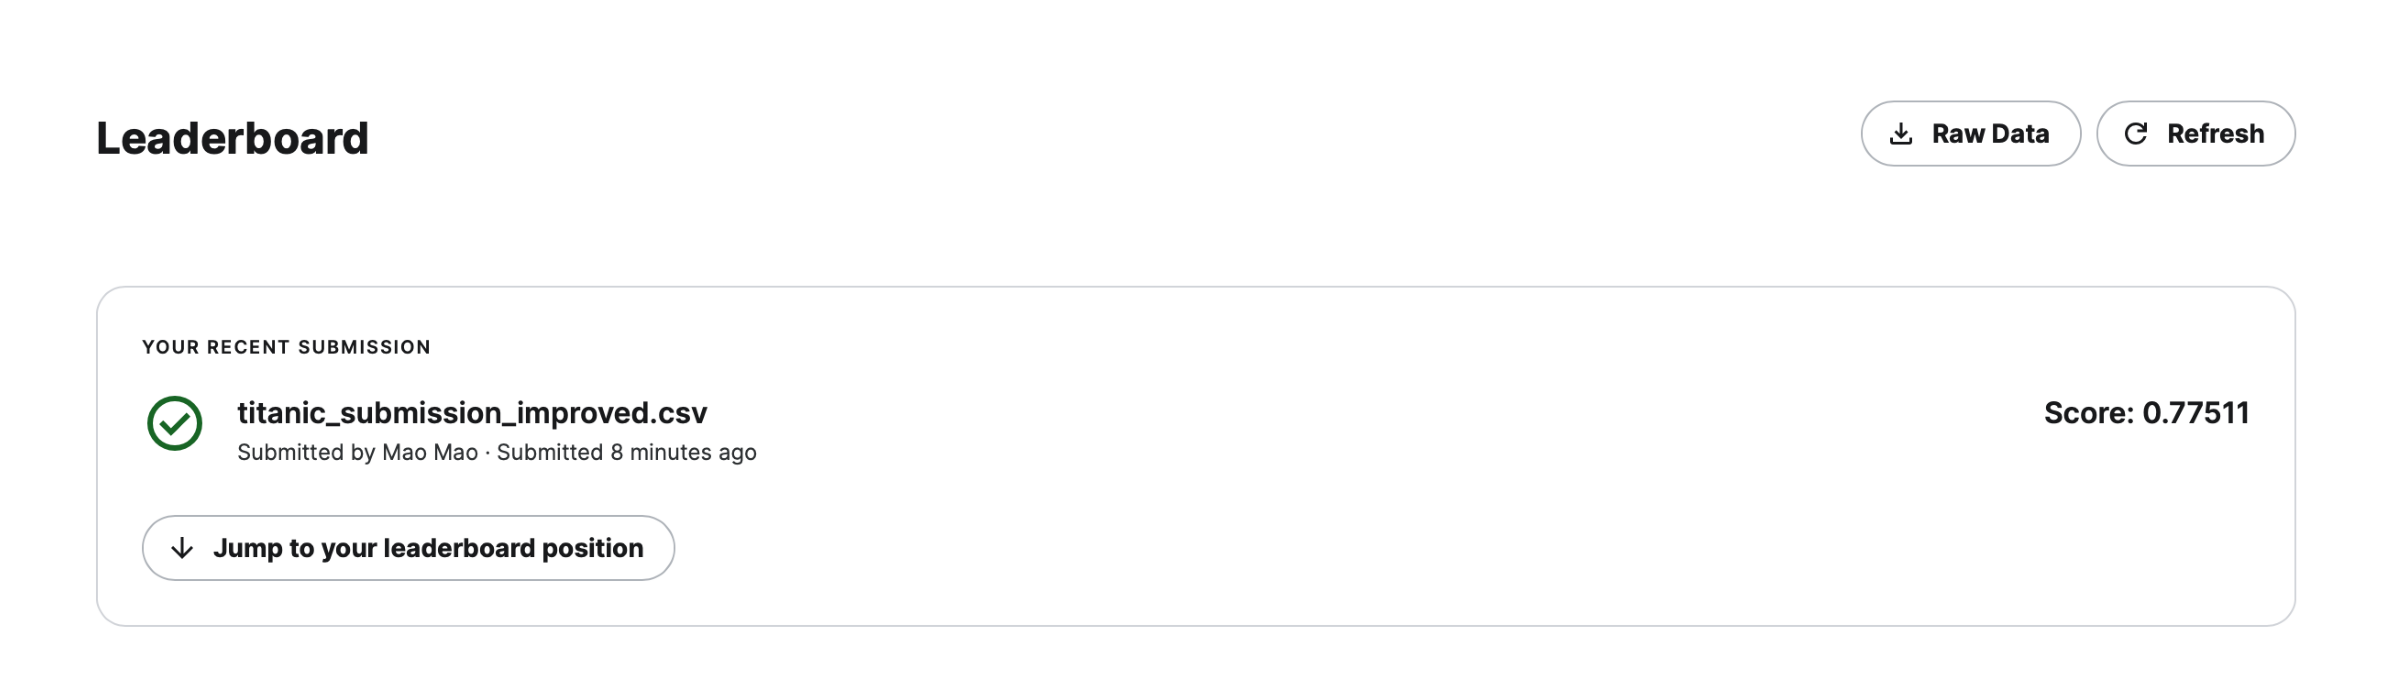

In [61]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread('Submission.png')
plt.figure(figsize=(10, 6), dpi=300) # Higher DPI for better resolution
plt.imshow(img)
plt.axis('off') # Hide axis
plt.show()